#### 1. Data Exploration

#### *Walmart, the biggest retail store in US, want to forecast their sale during the certain time in year. We have the data sale of 45 store across the country and many factors which could possibly influence the sale during this time. This project to predict the sale base on the history sale of Walmart's dataset*

* Store - the store number<br>
* Date - the week of sales<br>
* Weekly_Sales - sales for the given store<br>
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week<br>
* Temperature - Temperature on the day of sale<br>
* Fuel_Price - Cost of fuel in the region<br>
* CPI – Prevailing consumer price index<br>
* Unemployment - Prevailing unemployment rate<br>
* Holiday Events<br>

https://www.kaggle.com/code/yasserh/walmart-sales-prediction-best-ml-algorithms/notebook

In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [647]:
df = pd.read_csv("Walmart.csv")

display(df.head())

print("\033[1m The dataset consists of {} features and {} samples.\033[0m".format(df.shape[1], df.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


 The dataset consists of 8 features and 6435 samples.


In [648]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [649]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df = df.drop(columns="Date")

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.4 KB


In [651]:
df = df[df.columns[[7,8,9,0,2,3,4,5,6,1]]]

In [652]:
df.nunique(axis=0)

Day               31
Month             12
Year               3
Store             45
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Weekly_Sales    6435
dtype: int64

#### 2.Exploratory Data Analysis (EDA)

In [653]:
target = 'Weekly_Sales'

In [654]:
fearture = [i for i in df.columns if i != target]

In [655]:
cat_feature = fearture[0:5]
num_feature = fearture[5:]

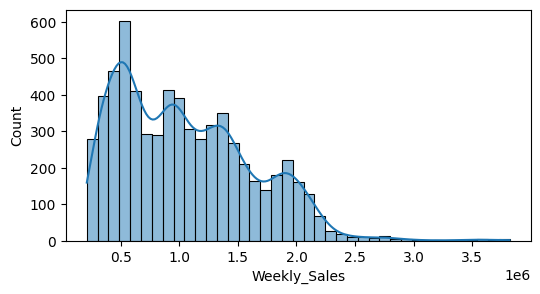

In [656]:
plt.figure(figsize=(6,3))

sns.histplot(data= df[target], kde=True)

plt.show()

*We can see the distribution of target column is normal, average about 24 bins*

##### *Explore categocial data columns*

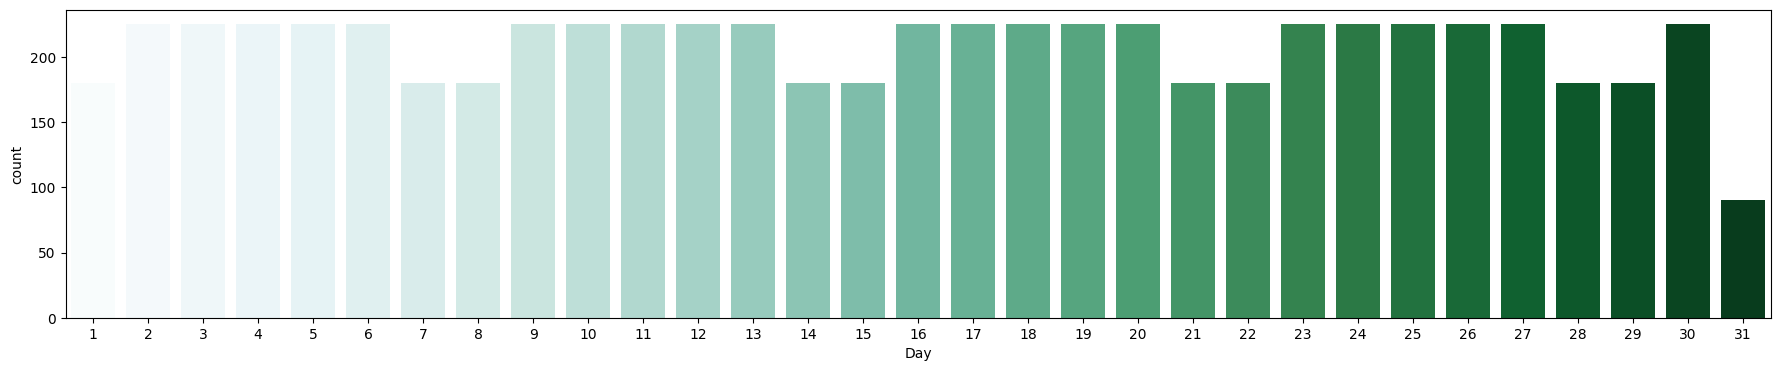

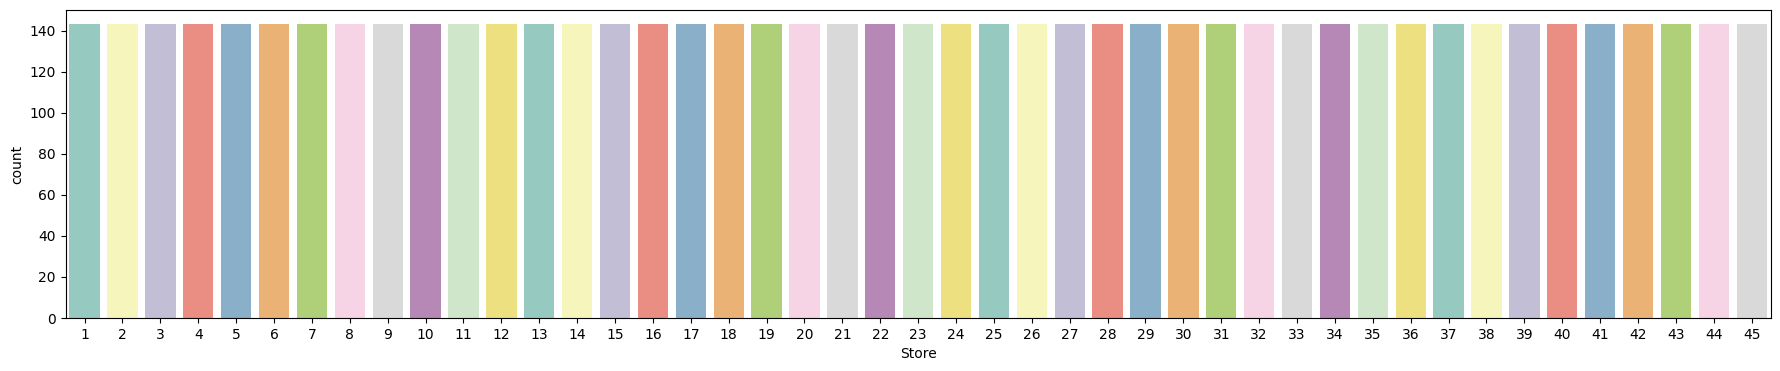

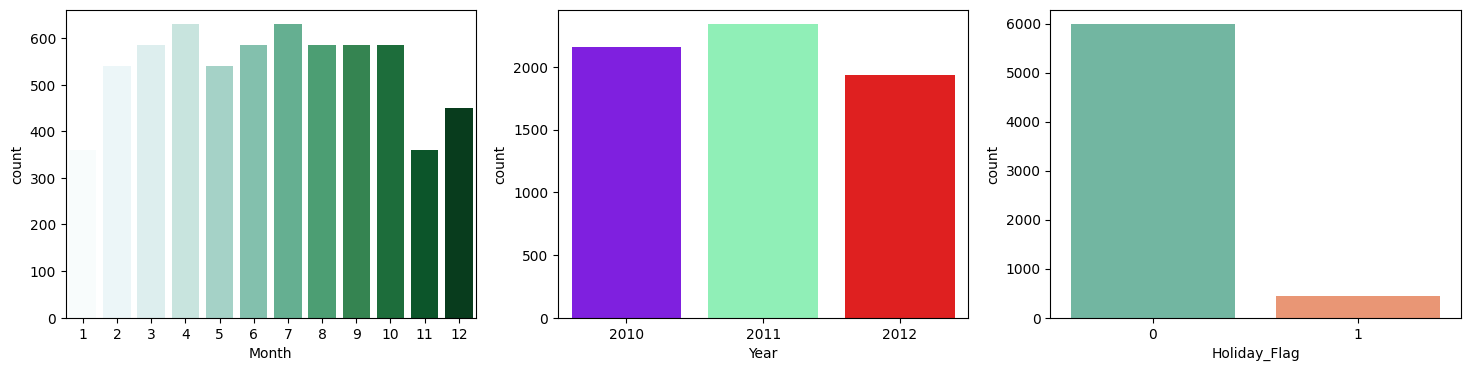

In [657]:
palette = ["BuGn", "rainbow", "Set2", "Set3", "plasma"]
for i in range(len(cat_feature)):
    if len(df[cat_feature[i]].unique()) > 12:
        plt.figure(figsize=(22,4))
        sns.countplot(data = df[cat_feature], x=cat_feature[i], hue=cat_feature[i], palette=palette[i], legend=False,)
        plt.show()

# Get number of categorical columns which smaller 12        
n = sum((df[cat_feature].nunique()) <= 12)
#Get list of these columns
a = (df[cat_feature].nunique() <= 12)
a = a.index[a]

#plt.figure(figsize=(30,5)) 
fig, ax = plt.subplots(1,n)
for i in range(n): 
        sns.countplot(data = df[cat_feature], x=a[i], hue=a[i], palette=palette[i], legend=False, ax=ax[i])
fig.set_size_inches(18,4)
plt.show()

*The distribution of data in categorical columns is quite balanced, there's no abnormal here*

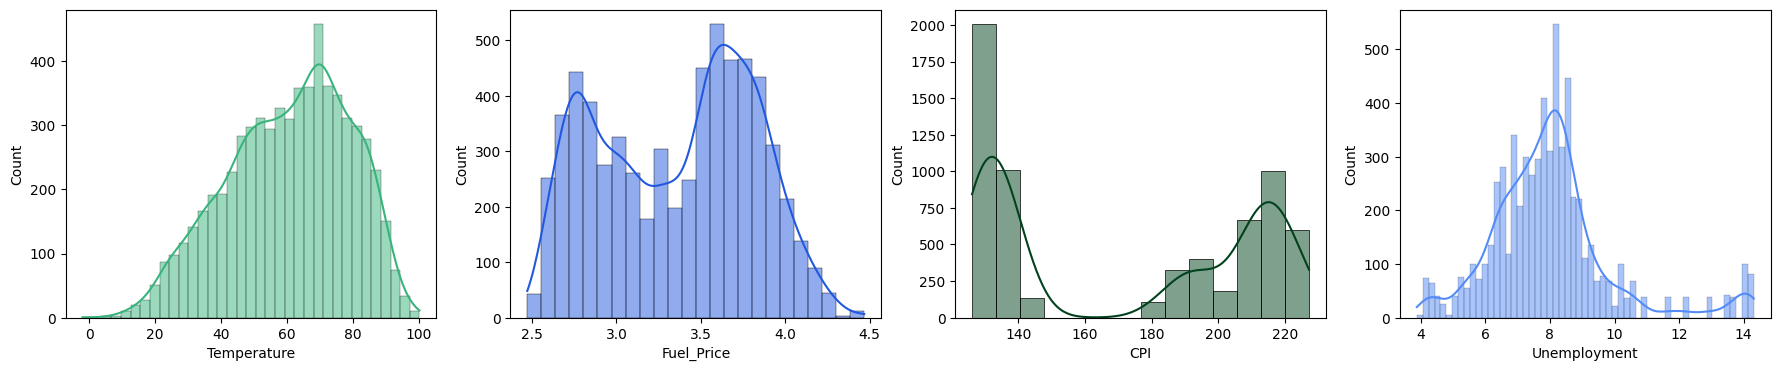

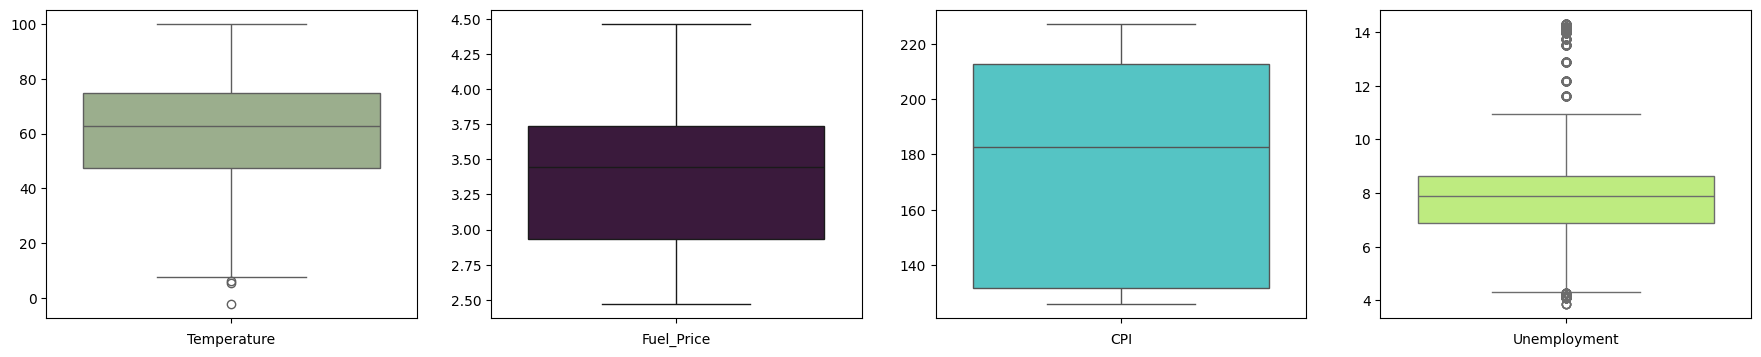

In [658]:
fix, ax = plt.subplots(1, len(num_feature))
for i in range(len(num_feature)):
    sns.histplot(df[num_feature[i]], ax=ax[i],color=list(np.random.randint([255,255,255])/255), kde=True)
fix.set_size_inches(22,4)

fix, ax = plt.subplots(1, len(num_feature))
for i in range(len(num_feature)):
    sns.boxplot(df[num_feature[i]], ax=ax[i],color=list(np.random.randint([255,255,255])/255))
    ax[i].set_ylabel("")
    ax[i].set_xlabel(num_feature[i])
fix.set_size_inches(22,4)
plt.show()



*We can see there are some outliner data which we will remove in next process*

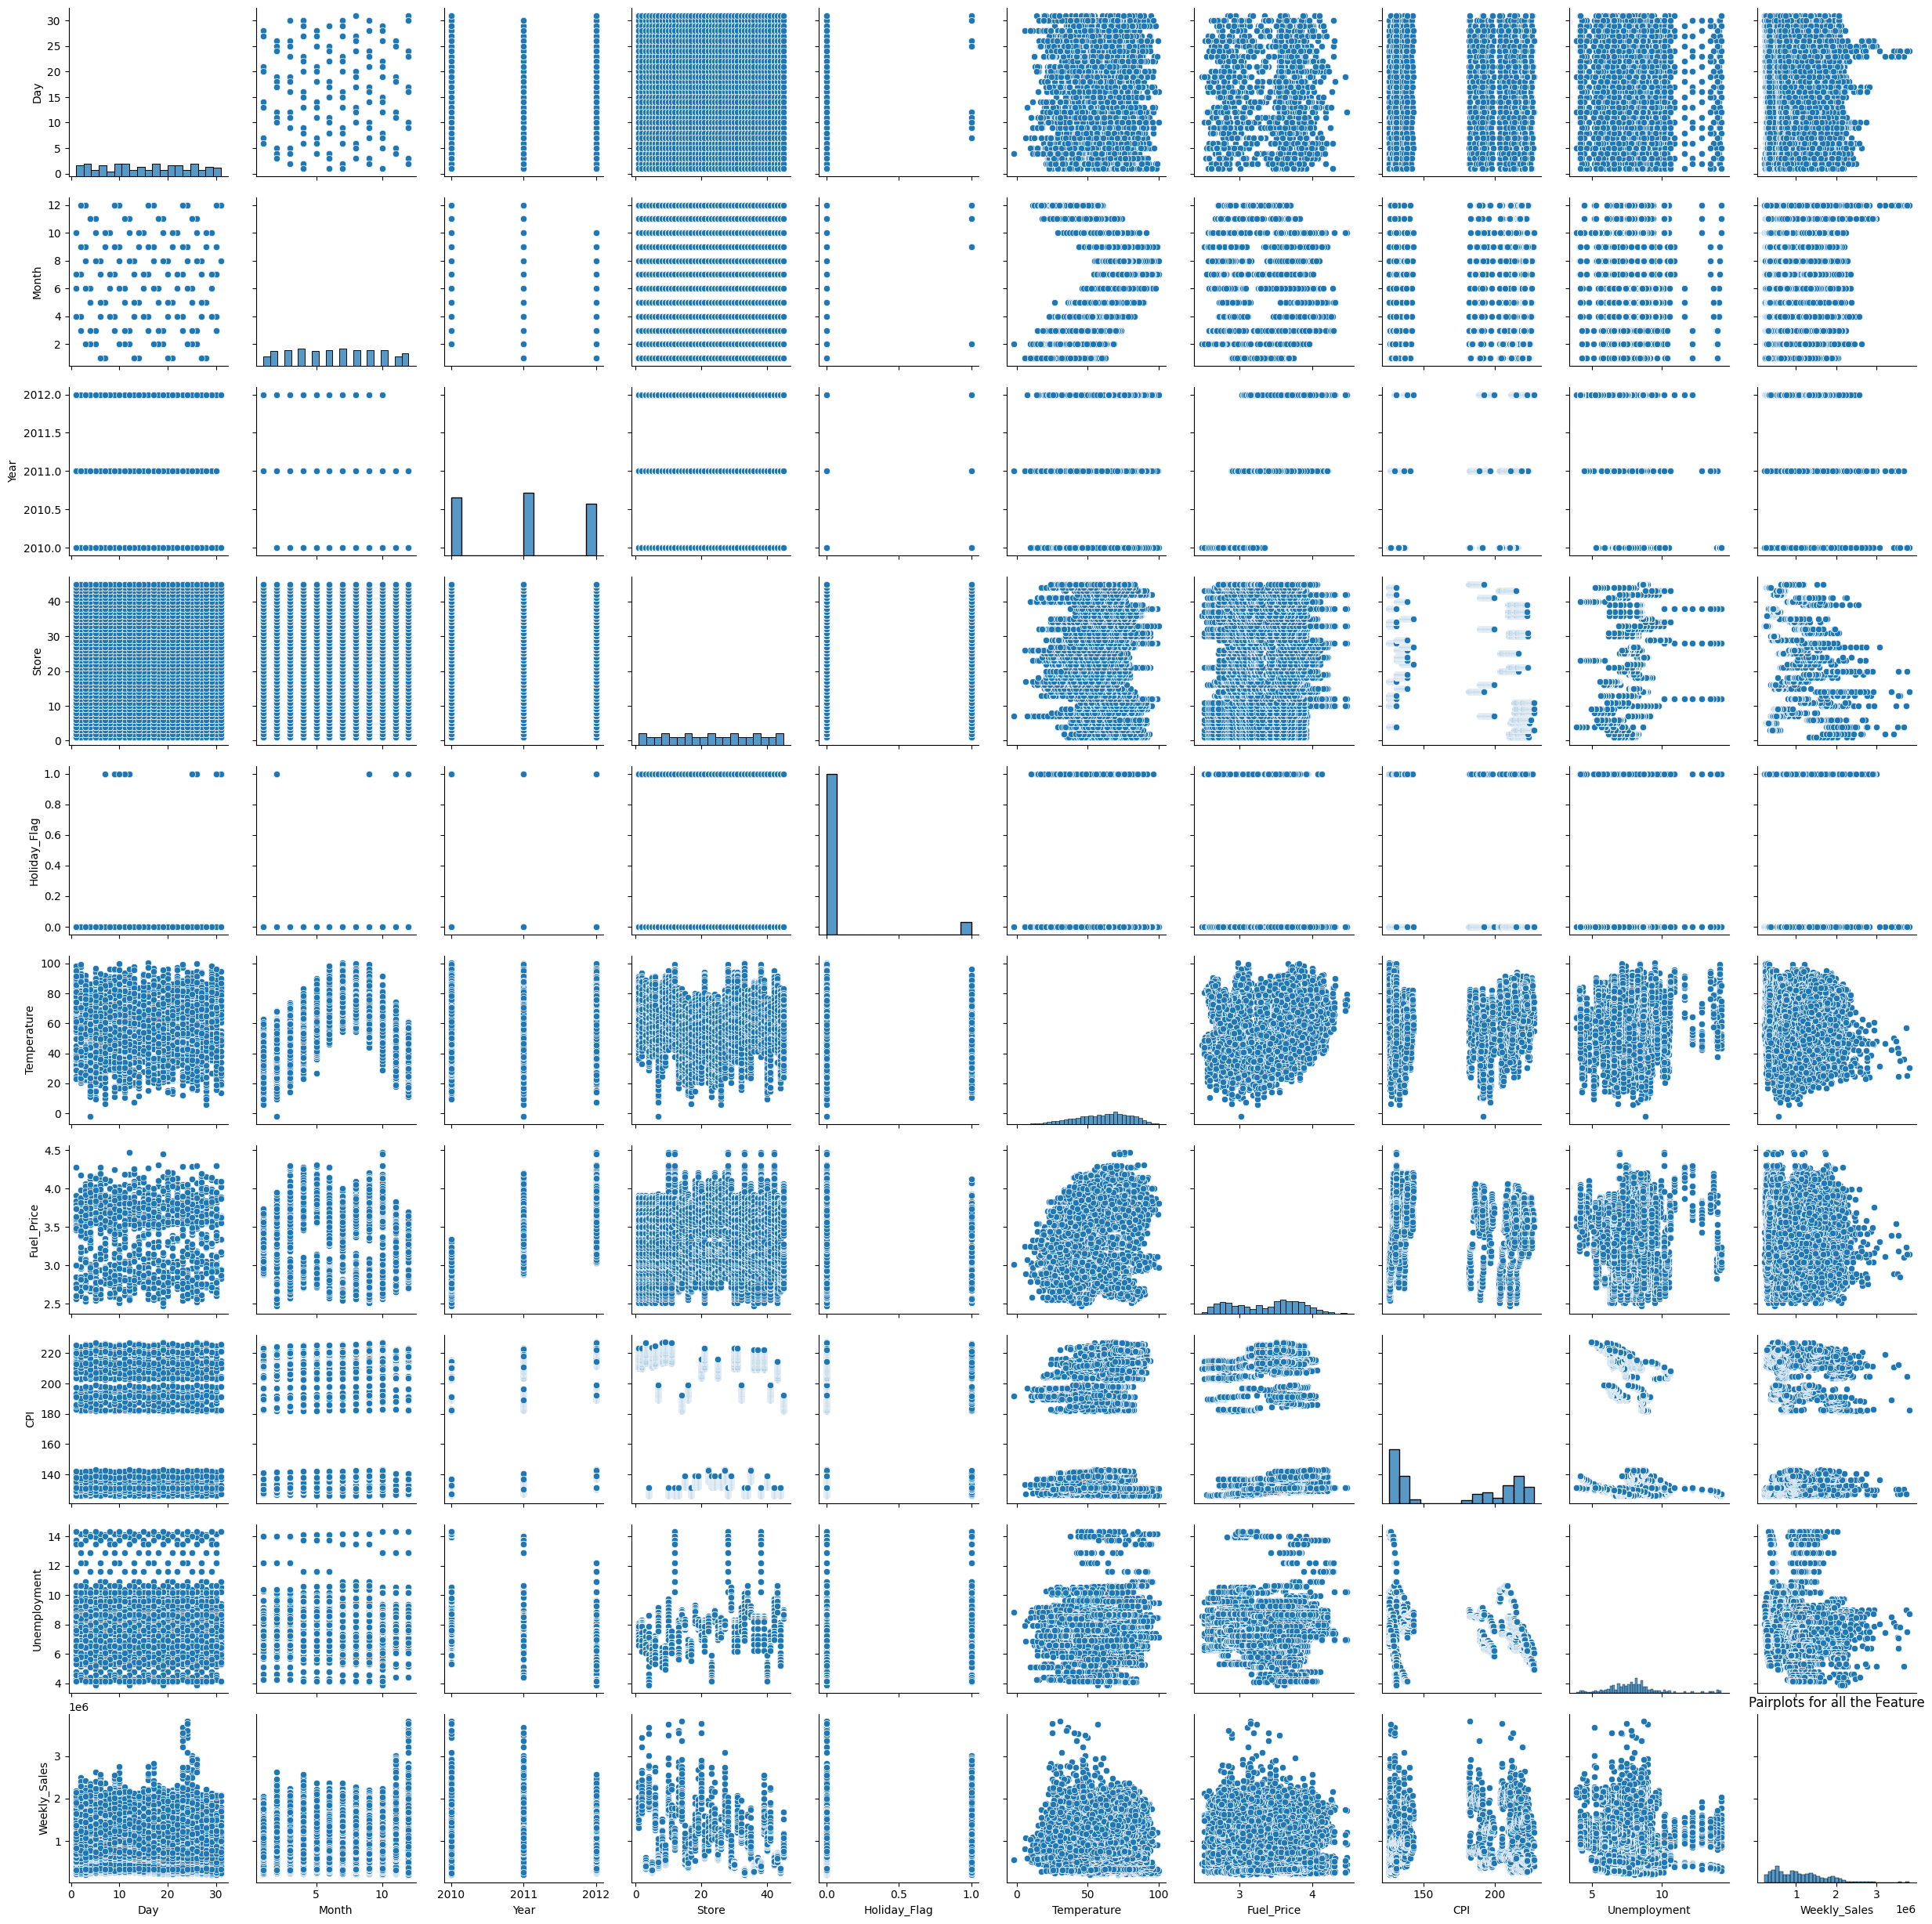

In [659]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
plt.show()

#### 3. Preprocessing Data

3.1 Remove duplicated data

In [660]:
print("Number of data entries before drop duplicate: {}".format(df.shape[0]))
df.drop_duplicates(inplace=True)
print("Number of data entries after drop duplicate: {}".format(df.shape[0]))

Number of data entries before drop duplicate: 6435
Number of data entries after drop duplicate: 6435


3.2 Dealing with missing data

In [661]:
total_null = df.isnull().sum()
percel_null = total_null / df.isnull().count()
pd.concat([total_null, percel_null], axis=1, keys=["Number of null", "Percent"])

,Number of null,Percent
Day,0,0.0
Month,0,0.0
Year,0,0.0
Store,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Weekly_Sales,0,0.0


*There's no missing data in this dataset*

3.3 Remove outliner

In [662]:
Q3 = df[num_feature].quantile(0.75)
Q1 = df[num_feature].quantile(0.25)
IQR = (df[num_feature].quantile(0.75) - df[num_feature].quantile(0.25))

In [663]:
for i in num_feature:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQR = (df[i].quantile(0.75) - df[i].quantile(0.25))
    df = df[df[i] <= Q3 + (IQR*1.5)]
    df = df[df[i] >= Q1 - (IQR*1.5)]

3.4 Prepare training, testing dataset and encoding categorical features

In [664]:
from sklearn.model_selection import train_test_split

In [665]:
X = df[fearture]
Y = df[target]

In [666]:
X = pd.get_dummies(X, columns=list(cat_feature))

In [667]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [668]:
from sklearn.preprocessing import StandardScaler

In [669]:
std = StandardScaler()
x_train_std = x_train.copy()
x_test_std = x_test.copy()

for i in num_feature:
    scale = StandardScaler().fit(x_train_std[[i]])
    x_train_std[i] = scale.transform(x_train[[i]])
    x_test_std[i] = scale.transform(x_test[[i]])


#### 4. Model Prediction

4.1 Linear Regression

In [670]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [671]:
def evaluate(true_value, prediction):
    plt.figure(figsize=(5,5))
    plt.scatter(true_value, prediction)
    plt.plot(true_value, true_value, color="red",linestyle="dashed")
    plt.xlabel("True value")
    plt.ylabel("Prediction")
    print("R2 Score of this model is {}".format(r2_score(true_value,prediction)))
    print("Mean square error this model is {}".format(mean_squared_error(true_value,prediction)))
    return [r2_score(true_value,prediction),mean_squared_error(true_value,prediction)]

In [672]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train_std, y_train)
LR_predict_train = LR.predict(x_train_std)
LR_predict_test = LR.predict(x_test_std)

R2 Score of this model is 0.9467529973895966
Mean square error this model is 17165562363.857815
R2 Score of this model is 0.9380322949637893
Mean square error this model is 21023719875.508617


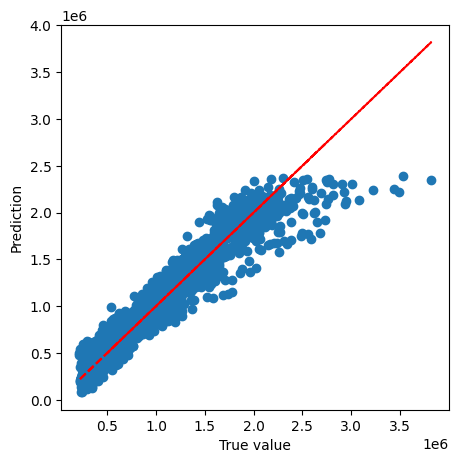

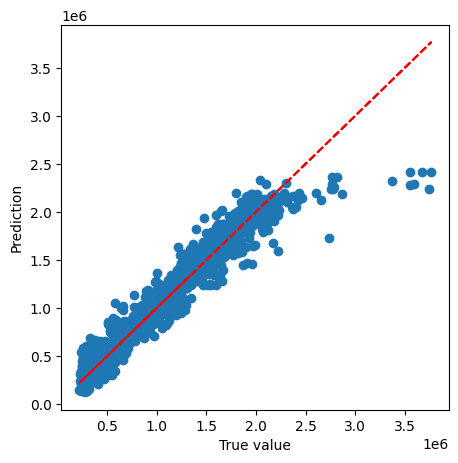

In [673]:
evaluate(y_train, LR_predict_train)
LR_R2score, LR_MSE = evaluate(y_test, LR_predict_test)

4.2 Decision Tree Regressor

In [674]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train_std,y_train)

tree_predict_train = tree.predict(x_train_std)
tree_predict_test = tree.predict(x_test_std)

R2 Score of this model is 1.0
Mean square error this model is 0.0
R2 Score of this model is 0.9218534802732615
Mean square error this model is 26512689779.63305


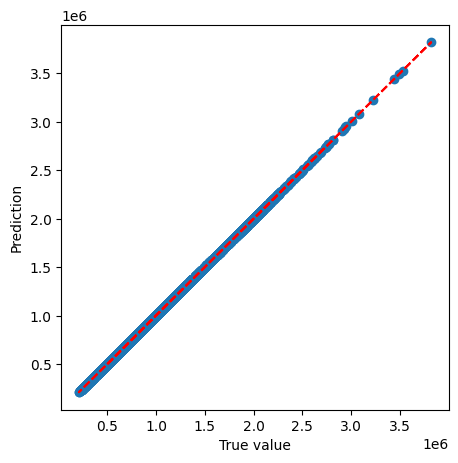

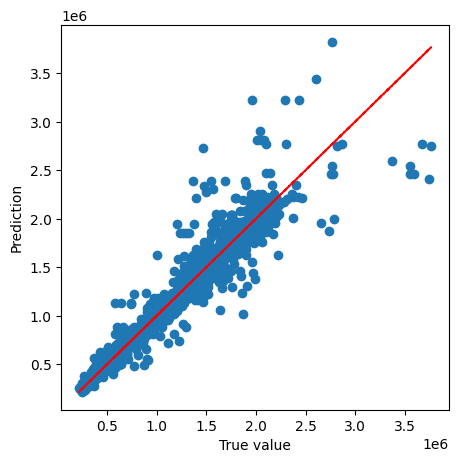

In [675]:
evaluate(y_train,tree_predict_train)
DR_R2score, DR_MSE = evaluate(y_test,tree_predict_test)

4.3 Deep Neural Network

In [676]:
from tensorflow import keras
from tensorflow.keras import layers

In [677]:
normalization = keras.layers.Normalization(axis=-1)

In [678]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [679]:
normalization.adapt(np.array(x_train))

In [680]:
DNN = keras.Sequential([
      normalization,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1)
])

In [681]:
DNN.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 97)                195       
 tion)                                                           
                                                                 
 dense_63 (Dense)            (None, 256)               25088     
                                                                 
 dense_64 (Dense)            (None, 256)               65792     
                                                                 
 dense_65 (Dense)            (None, 1)                 257       
                                                                 
Total params: 91332 (356.77 KB)
Trainable params: 91137 (356.00 KB)
Non-trainable params: 195 (784.00 Byte)
_________________________________________________________________


In [682]:
DNN.compile(loss='mean_absolute_error',
            optimizer= keras.optimizers.legacy.Adam(0.001),
            metrics=["mean_absolute_error", "mean_squared_error"])

In [683]:
history = DNN.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

In [684]:
DNN_predict_train = DNN.predict(x_train)
DNN_predict_test = DNN.predict(x_test)

56/56 [==============================] - 0s 360us/step


R2 Score of this model is 0.9683094243881589
Mean square error this model is 10216284961.462324
R2 Score of this model is 0.9548403654190489
Mean square error this model is 15321263012.006859


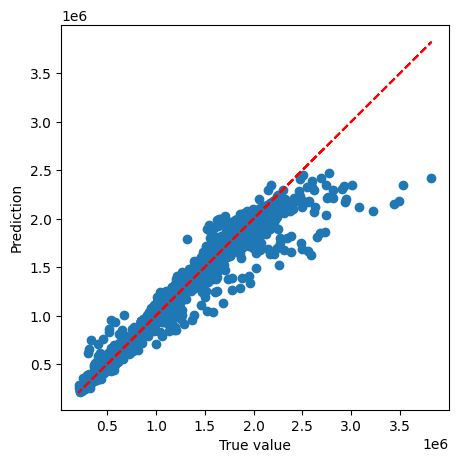

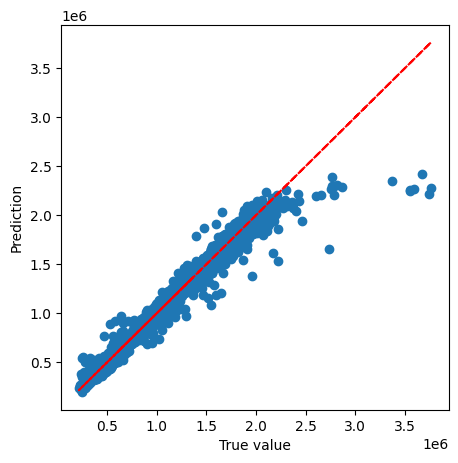

In [685]:
evaluate(y_train, DNN_predict_train)
DNN_R2score, DNN_MSE = evaluate(y_test, DNN_predict_test)

#### 5.Result

In [686]:
R2 = [LR_R2score, DR_R2score, DNN_R2score]
MSE = [LR_MSE, DR_MSE, DNN_MSE]

pd.DataFrame(list(zip(R2,MSE)),index=["Linear Regression", "DecisionTree Regressor", "Deep Neural Network"],columns=["R2 Score", "Mean Square Error"])

,R2 Score,Mean Square Error
Linear Regression,0.938032,2.102372e+10
DecisionTree Regressor,0.921853,2.651269e+10
Deep Neural Network,0.954840,1.532126e+10


As the result, the DNN model have the best R2 Score and the least MSE